In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:

data_1 = pd.read_csv('G:\Major project\Twitter datasets/new_data_1.csv', error_bad_lines=False,encoding = 'utf-8')
data_2 = pd.read_csv('G:\Major project\Twitter datasets/new_data_2.csv', error_bad_lines=False,encoding = 'utf-8')
data_3 = pd.read_csv('G:\Major project\Twitter datasets/new_data_3.csv', error_bad_lines=False,encoding = 'utf-8')
# data = pd.concat([data_1, data_2], axis=0)
data = pd.concat([data_1, data_2,data_3], axis=0)
# Reindex the data frame and drop the column added by the reset_index function
data.reset_index(drop=True, inplace=True)


pd.set_option('max_colwidth', 140)
# Display the first 10 rows
data = data.drop(["Unnamed: 0"],axis = 1)
data.head(10)


,Sentiment,SentimentText,few_basic_steps,After_stemming,After_lemmeetize
0,0,is so sad for my APL friend.............,sad apl friend,sad apl friend,sad apl friend
1,0,I missed the New Moon trailer...,missed new moon trailer,miss new moon trailer,miss new moon trailer
2,1,omg its already 7:30 :O,oh god already 730 sad,oh god alreadi 730 sad,oh god alreadi 730 sad
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,omgaga instant message sooo instant message gunna cry dentist since 11 suposed get crown put 30mins,omgaga instant messag sooo instant messag gunna cri dentist sinc 11 supos get crown put 30min,omgaga instant messag sooo instant messag gunna cri dentist sinc 11 supos get crown put 30min
4,0,i think mi bf is cheating on me!!! T_T,think mi boyfriend cheating negative,think mi boyfriend cheat neg,think mi boyfriend cheat neg
5,0,or i just worry too much?,worry much,worri much,worri much
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst relaxing,juuuuuuuuuuuuuuuuussssst relax,juuuuuuuuuuuuuuuuussssst relax
7,0,Sunny Again Work Tomorrow :-| TV Tonight,sunny work tomorrow negative television tonight,sunni work tomorrow neg televis tonight,sunni work tomorrow neg televis tonight
8,1,handed in my uniform today . i miss you already,handed uniform today miss already,hand uniform today miss alreadi,hand uniform today miss alreadi
9,1,hmmmm.... i wonder how she my number @-),hmmmm wonder number positive,hmmmm wonder number posit,hmmmm wonder number posit


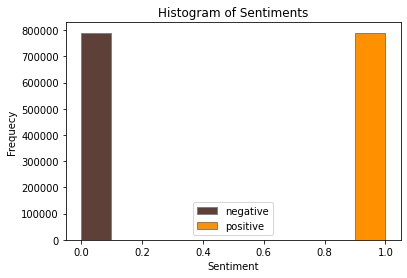

In [4]:
plt.close()
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data.Sentiment, edgecolor='gray')

# Set plot title
ax.set_title("Histogram of Sentiments")

# Set x-axis name
ax.set_xlabel("Sentiment")

# Set y-axis name
ax.set_ylabel("Frequecy")

# Select the first patch (a rectangle, object of class matplotlib.patches.Patch)
# corresponding to negative sentiment and color it
patches[0].set_facecolor("#5d4037")
patches[0].set_label("negative")

# Same for the positive sentiment but in another color.
patches[-1].set_facecolor("#ff9100")
patches[-1].set_label("positive")

# Add legend to a plot     
plt.legend()

In [3]:
data = data.dropna()

In [4]:
##using afte stemming
X = data.After_stemming	
y = data.Sentiment

In [5]:
X.isnull().sum().sum()

0

In [9]:
print(X.values)

['sad apl friend' 'miss new moon trailer' 'oh god alreadi 730 sad' ...
 'zzzzzzzzzz wait homework' 'zzzzzzzzzzzzz whatev'
 'zzzzzzzzzzzzzzzzzzz wish']


In [10]:
X.shape

(1572262,)

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [22]:
count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(X)  
print(final_vectorized_data.shape)


(1572262, 3950368)


In [21]:
# print(final_vectorized_data.get_feature_names()[22])

00 look


In [23]:
# f = count_vectorizer.transform(final_vectorized_data)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, y,
                                                    test_size=0.2, random_state=69)

In [25]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (1257809, 3950368)
X_test_shape :  (314453, 3950368)
y_train_shape :  (1257809,)
y_test_shape :  (314453,)


In [26]:
model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

In [27]:
score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.7843970323068948


In [28]:
import pickle
pickle.dump(count_vectorizer, open(r"G:\Major project\Models\counter1.sav","wb"))
pickle.dump(model_naive, open("G:\Major project\Models\modelnaive1.sav", 'wb'))

In [13]:
counter = pickle.load(open(r"G:\Major project\Models\counter.sav","rb"))
model = pickle.load(open("G:\Major project\Models\modelnaive.sav", 'rb'))

In [17]:
# count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = counter.fit_transform(X)  


In [18]:
print(final_vectorized_data.shape)

(1572262, 3950368)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, y,
                                                    test_size=0.2, random_state=69)

In [20]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (1257809, 3950368)
X_test_shape :  (314453, 3950368)
y_train_shape :  (1257809,)
y_test_shape :  (314453,)


In [21]:
predicted_naive = model_naive.predict(X_test)
score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.7843970323068948


In [26]:
##training after lemmetizing
X = data.After_lemmeetize
y = data.Sentiment

In [27]:
X.isnull().sum().sum()

0

In [43]:
cv = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data_lemmetize = cv.fit_transform(X)  
print(final_vectorized_data.shape)


(1572262, 3950368)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data_lemmetize, y,
                                                    test_size=0.2, random_state=69)

In [35]:
model_naive_lemmetize = MultinomialNB().fit(X_train, y_train) 
predicted_naive_lemmetize = model_naive_lemmetize.predict(X_test)

In [36]:
score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.7843970323068948


In [37]:
import pickle
pickle.dump(count_vectorizer, open(r"G:\Major project\Models\naivevector.pickle","wb"))
pickle.dump(model_naive, open("G:\Major project\Models\modelwithnaive.sav", 'wb'))

## using SVM

In [38]:
X = data.After_stemming	
y = data.Sentiment

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X)

vectorizer

TfidfVectorizer()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(vectorizer, y,
                                                    test_size=0.2, random_state=69)

TypeError: Singleton array array(TfidfVectorizer(), dtype=object) cannot be considered a valid collection.

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(X_train, y_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(X_test)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(y_test, prediction_linear, output_dict=True)



In [ ]:
report

In [ ]:
score_naive = accuracy_score(prediction_linear, y_test)
print("Accuracy with SVM: ",score_naive)

In [ ]:
import pickle
pickle.dump(cv, open(r"G:\Major project\Models\svmvector.pickle","wb"))
pickle.dump(classifier_linear, open("G:\Major project\Models\modelwithsvm.sav", 'wb'))